# TODO: Task 1 - Approximating Functions

In [4]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy.spatial.distance import cdist
import utils
%reload_ext autoreload
%autoreload 2

# Load datasets with linear and non-linear function data
data_A = np.loadtxt('../../data/linear_function_data.txt')
data_B = np.loadtxt('../../data/nonlinear_function_data.txt')

### TODO: Part 1 - Approximating function in dataset A with a linear function

Text(0.5, 1.0, 'Linear function')

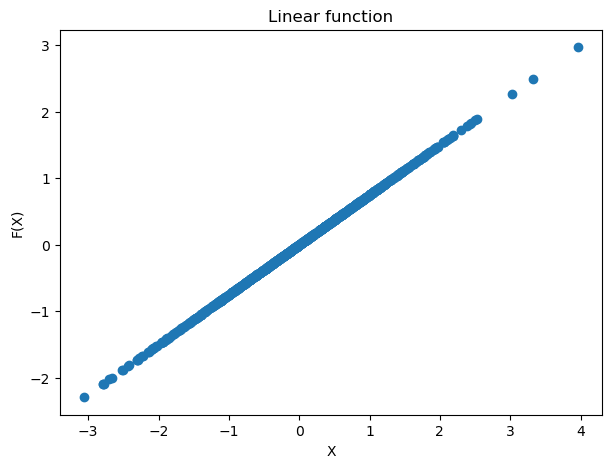

In [5]:
fig, ax = plt.subplots(1,1, figsize =(7,5))
X_A = data_A[:,0]
Y_A = data_A[:,1]

ax.scatter(X_A, Y_A)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

In [6]:
# Function to add jitter
def add_jitter(arr, noise_level=0.05):
    return arr + np.random.normal(0, noise_level, arr.shape)

updated


Text(0.5, 1.0, 'Linear function')

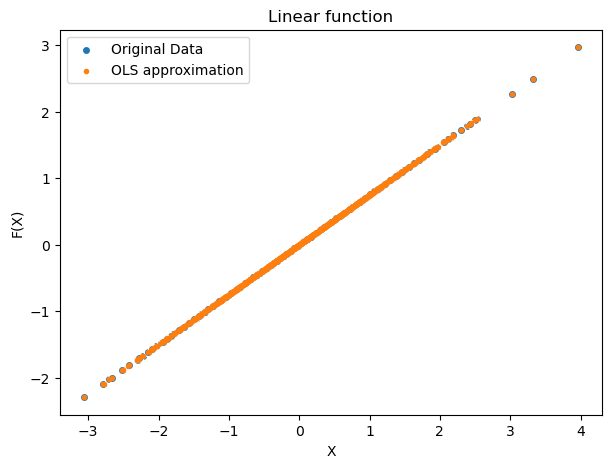

In [7]:
approx_y_1 = utils.transform(X_A, utils.least_squares(X_A, Y_A))

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_A,Y_A,label = 'Original Data', edgecolor = 'w')
ax.scatter(X_A, approx_y_1, label= 'OLS approximation', marker = '.')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

### TODO: Part 2 -  Approximating function in dataset B with a linear function

Text(0.5, 1.0, 'Non Linear function')

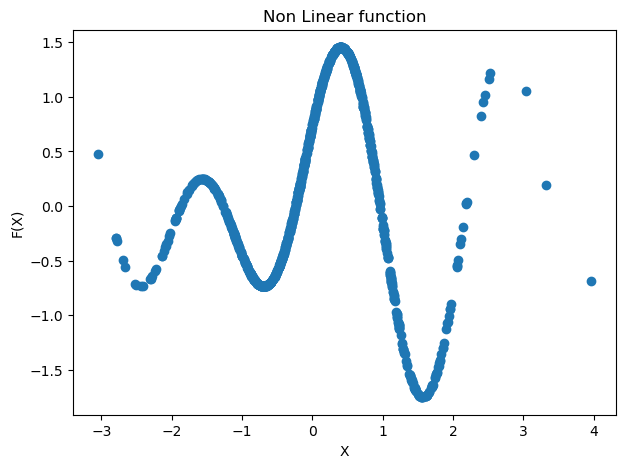

In [8]:
fig, ax = plt.subplots(1,1, figsize =(7,5))
X_B = data_B[:,0]
Y_B = data_B[:,1]

ax.scatter(X_B, Y_B)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

updated


Text(0.5, 1.0, 'Linear function')

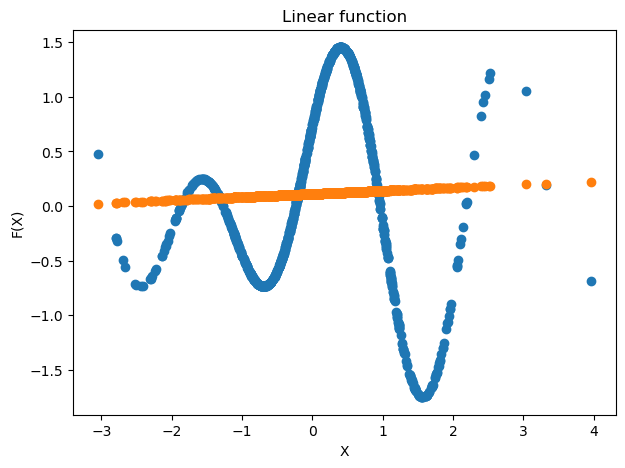

In [9]:
approx_y_2 = utils.transform(X_B, utils.least_squares(X_B, Y_B))

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B)
ax.scatter(X_B, approx_y_2)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

### TODO: Part 3.1 - Approximating function in dataset B with radial basis functions

updated


Text(0.5, 1.0, 'Non Linear function')

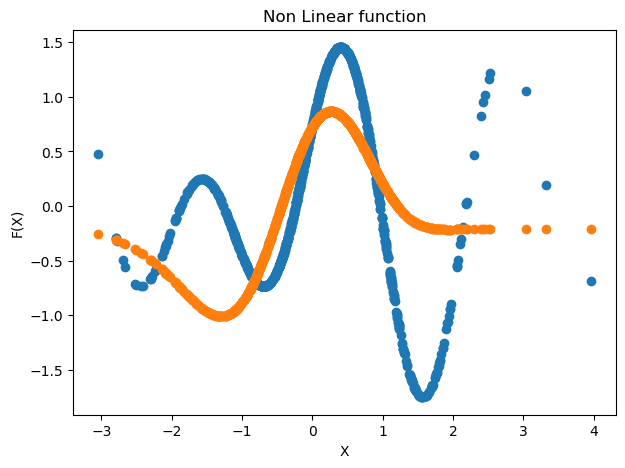

In [16]:
L = 5000
phi_x_b = utils.approx_non_linear_function(X_B,Y_B,L,0.08)
approx_y_3 = utils.transform(phi_x_b.T, utils.least_squares(phi_x_b.T, Y_B))

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B)
ax.scatter(X_B, approx_y_3)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

In [17]:
phi_x_b.shape

(5000, 1000)

Text(0.5, 1.0, 'Non Linear function')

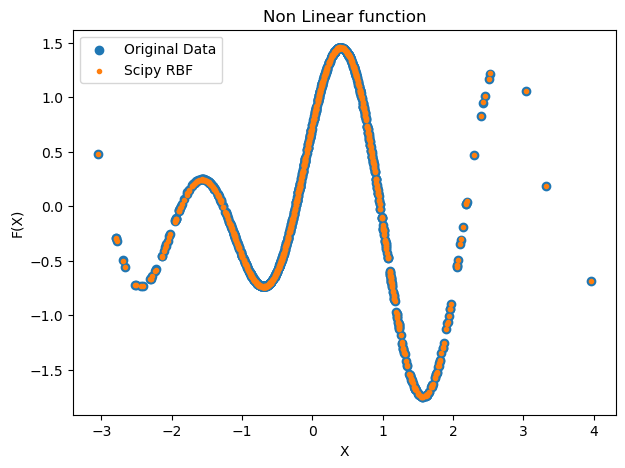

In [18]:
#we cheat with interpolation built-in function
approx_y_cheat = utils.built_int_interpolator(np.array([X_B]).T,Y_B,0.9)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B, label = 'Original Data')
ax.scatter(X_B, approx_y_cheat, marker= '.', label= 'Scipy RBF')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

Text(0.5, 1.0, 'Linear function')

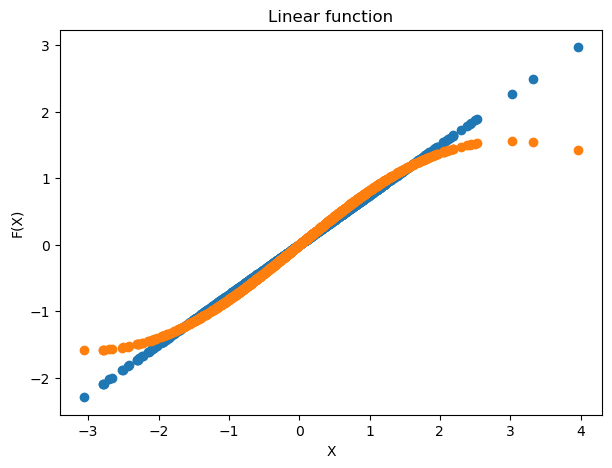

In [180]:
L = 100
phi_x_a = utils.approx_non_linear_function(X_A,Y_A,L,2)
approx_y_3 = utils.transform(phi_x_a.T, utils.least_squares(phi_x_a.T, Y_A))

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_A,Y_A)
ax.scatter(X_A, approx_y_3)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")